#### Step 1: Face recognition

In [12]:
import cv2

alg = "haarcascade_frontalface_default.xml"
haar_cascade = cv2.CascadeClassifier(alg)

filename = "people_photo.jpg"
img = cv2.imread(filename, 0)
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

faces = haar_cascade.detectMultiScale(gray_img, scaleFactor=1.3, minNeighbors=4)

face_increment = 0

for x, y, w, h in faces:
    cropped_image = img[y : y + h, x : x + w]
    target_file_name = "detected_faces/face_{0}.jpg".format(face_increment)
    face_increment += 1
    
    cv2.imwrite(
        target_file_name,
        cropped_image,
    )

#### Step 2: Embeddings Calculation

In [7]:
import psycopg2
import numpy as np
from imgbeddings import imgbeddings
from PIL import Image
import cv2
import os

In [4]:
conn = psycopg2.connect('host=localhost port=9001 dbname=postgres user=postgres password=admin sslmode=prefer connect_timeout=10')

In [13]:
for file_name in os.listdir("detected_faces"):
    
    img = Image.open("detected_faces/" + file_name)
    ibed = imgbeddings()
    embedding = ibed.to_embeddings(img)[0]

    cur = conn.cursor()
    cur.execute('INSERT INTO pictures values (%s,%s)', (file_name, embedding.tolist())) 
    print(file_name)   
conn.commit()


c:\Users\astie\anaconda3\envs\face\lib\site-packages\huggingface_hub\file_download.py:655: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(
c:\Users\astie\anaconda3\envs\face\lib\site-packages\transformers\models\clip\processing_clip.py:144: FutureWarning: `feature_extractor` is deprecated and will be removed in v5. Use `image_processor` instead.
  warnings.warn(


face_0.jpg
face_1.jpg
face_2.jpg
face_3.jpg
face_4.jpg
face_5.jpg


#### Step 3: Calculate embeddings on a new picture

In [14]:
from PIL import Image
file_name = "detected_faces/face_5.jpg"

img = Image.open(file_name)
ibed = imgbeddings()
img_embedding = ibed.to_embeddings(img)[0]

#### Step 4: Find similar images by querying the Postgresql database using pgvector

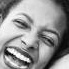

In [15]:
from IPython.display import Image, display


cur = conn.cursor()
string_representation = "["+ ",".join(str(x) for x in img_embedding.tolist()) + "]"
cur.execute("SELECT picture FROM pictures ORDER BY embedding <-> %s LIMIT 1;", (string_representation,))
rows = cur.fetchall()
for row in rows:
    display(Image(filename="detected_faces/"+row[0]))
cur.close()